In [1]:
import matlab.engine
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
eng = matlab.engine.start_matlab()
import cmasher as cmr
choice_cmap='viridis'
hist_color='purple'
import matplotlib.ticker as mticker
import os

savedir='/Users/andrewmiller/Desktop/Belgio/mini_emri/'

eng.addpath(eng.genpath('/Users/andrewmiller/Desktop/Belgio/dark_matter/pbh_cw/'));
eng.addpath(eng.genpath('/Users/andrewmiller/Desktop/Belgio/mini_emri/'));
# eng.addpath(eng.genpath('/Users/andrewmiller/Desktop/Belgio/'));
# eng.addpath(eng.genpath('/Users/andrewmiller/Desktop/O4/'));

In [2]:
CR_thr = 5.;
bin_thr = 4.;
Gamma = 0.95;
indir = '/Users/andrewmiller/Desktop/10Msun/f_ranges_10_Hz/';
h0_95_gfh,h0_95_track,h0min_theo,fmins,allamps,all_alleffs,all_alleffs_track = \
eng.analyze_mini_emri_run_example_multi_sigs_simulations(CR_thr,bin_thr,Gamma,indir,nargout=7)

In [84]:
h0_95_gfh = np.array(h0_95_gfh)
h0_95_track = np.array(h0_95_track)
h0min_theo = np.array(h0min_theo)
fmins = np.array(fmins)
allamps = np.array(allamps)
all_alleffs = np.array(all_alleffs)
all_alleffs_track = np.array(all_alleffs_track)

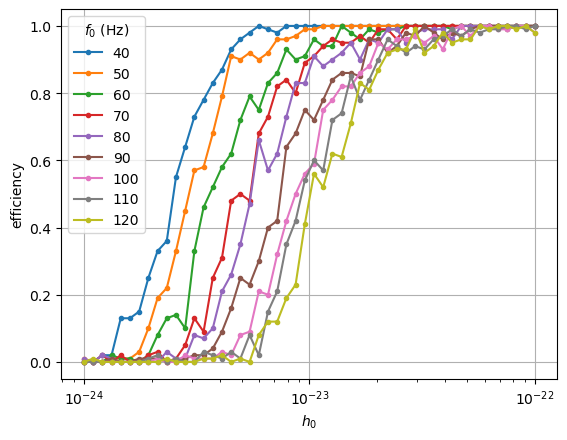

In [86]:
plt.semilogx(np.transpose(allamps),np.transpose(all_alleffs),'.-');
plt.xlabel(r'$h_0$'); plt.ylabel('efficiency')
plt.grid(True)
labels = np.rint(np.squeeze(np.transpose(fmins))).astype(int)
plt.legend(labels,title=r'$f_0$ (Hz)')
plt.savefig(savedir+'eff_curve_hough.png',format='png',dpi=400)

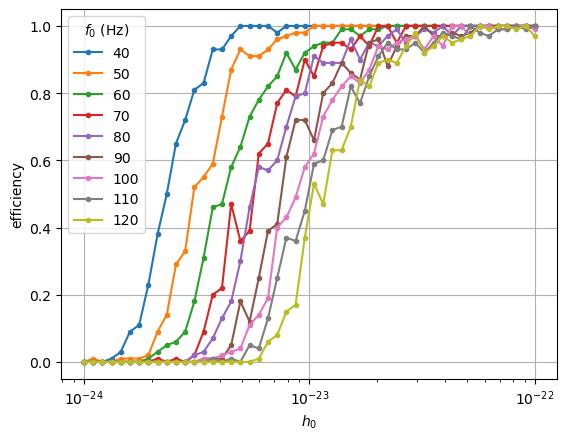

In [92]:
plt.semilogx(np.transpose(allamps),np.transpose(all_alleffs_track),'.-');
plt.xlabel(r'$h_0$'); plt.ylabel('efficiency')
plt.grid(True)
labels = np.rint(np.squeeze(np.transpose(fmins))).astype(int)
plt.legend(labels,title=r'$f_0$ (Hz)')
plt.savefig(savedir+'eff_curve_track.png',format='png',dpi=400)

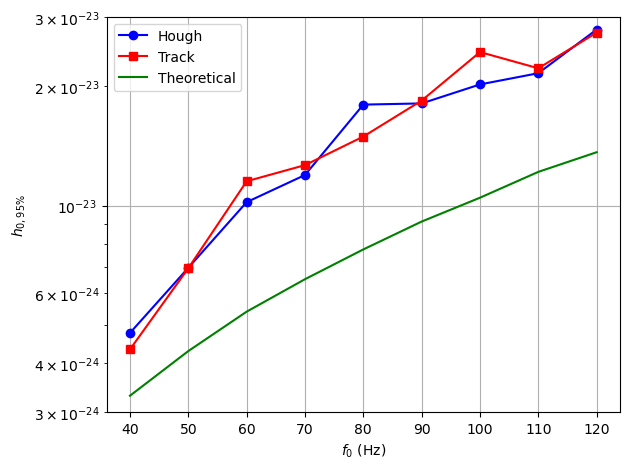

In [4]:
plt.semilogy(np.transpose(fmins),np.transpose(h0_95_gfh),'bo-',label='Hough');
plt.semilogy(np.transpose(fmins),np.transpose(h0_95_track),'rs-',label='Track');
plt.semilogy(np.transpose(fmins),np.transpose(h0min_theo),'g',label='Theoretical');
plt.legend()
plt.ylim([3e-24,3e-23]);
plt.grid(True)
plt.xlabel(r'$f_0$ (Hz)')
plt.ylabel(r'$h_{0,95\%}$');
plt.tight_layout()
plt.savefig(savedir+'theo_track_hough_compare.png',format='png',dpi=400)